## charger 500 tweets ##

In [13]:
import pandas as pd

data = pd.read_csv('C:/Users/USER_/Downloads/Documents/MR2/Data mining/sample_500_tweets.csv')
print(data.head())  


                   id                                               link  \
0  385862325875376128  https://twitter.com/realDonaldTrump/status/385...   
1  689804695221600256  https://twitter.com/realDonaldTrump/status/689...   
2  664628393921544192  https://twitter.com/realDonaldTrump/status/664...   
3  667366321999495168  https://twitter.com/realDonaldTrump/status/667...   
4  199573450485006336  https://twitter.com/realDonaldTrump/status/199...   

                                             content                 date  \
0  Great ruling on wind farm in Scotland—very sma...  2013-10-03 22:22:02   
1  # MakeAmericaGreatAgain # Trump2016 LIFE CHANG...  2016-01-20 14:40:29   
2  " @ ellenEspence: I'm not convinced that any c...  2015-11-12 03:18:51   
3  Dopey @ GeorgeWill, a big proponent of the Ira...  2015-11-19 16:38:24   
4  The election result in France is very disappoi...  2012-05-07 20:56:33   

   retweets  favorites mentions hashtags  geo  
0        22         14      NaN 

## Prétraitement des Tweets ## 

In [17]:
import pandas as pd
import re
import string

# Fonction de nettoyage
def clean_tweet(tweet):
    # Supprimer les mentions (@username)
    tweet = re.sub(r'@\w+', '', tweet)
    # Supprimer les hashtags (#hashtag)
    tweet = re.sub(r'#', '', tweet)
    # Supprimer les URL
    tweet = re.sub(r'http\S+|www.\S+', '', tweet)
    # Supprimer les caractères spéciaux
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Supprimer les espaces multiples
    tweet = tweet.strip()
    return tweet

# Charger le fichier complet
file_path = 'C:/Users/USER_/Downloads/Documents/MR2/Data mining/sample_500_tweets.csv'  # Remplacez par le chemin réel
df = pd.read_csv(file_path)

# Vérifier si la colonne contenant les tweets existe
if 'content' in df.columns:  # Remplacez 'content' par le vrai nom de la colonne contenant les tweets
    # Appliquer la fonction de nettoyage
    df['cleaned_content'] = df['content'].apply(clean_tweet)
else:
    raise ValueError("La colonne 'content' contenant les tweets n'a pas été trouvée.")

# Afficher un aperçu du DataFrame
print(df[['content', 'cleaned_content']].head())


                                             content  \
0  Great ruling on wind farm in Scotland—very sma...   
1  # MakeAmericaGreatAgain # Trump2016 LIFE CHANG...   
2  " @ ellenEspence: I'm not convinced that any c...   
3  Dopey @ GeorgeWill, a big proponent of the Ira...   
4  The election result in France is very disappoi...   

                                     cleaned_content  
0  Great ruling on wind farm in Scotlandvery smar...  
1  MakeAmericaGreatAgain  Trump2016 LIFE CHANGING...  
2  ellenEspence Im not convinced that any candida...  
3  Dopey  GeorgeWill a big proponent of the Iraq ...  
4  The election result in France is very disappoi...  


## afficher la  Les données nettoyées ## 

In [19]:
import pandas as pd

# Charger le dataset nettoyé
output_file = 'cleaned_dataset.csv'  
cleaned_data = pd.read_csv(output_file)

# Garder uniquement la colonne nettoyée
cleaned_only = cleaned_data[['cleaned_content']]

# Afficher les premières lignes pour vérifier
print(cleaned_only.head(10))

#  Sauvegarder dans un nouveau fichier
cleaned_only.to_csv('cleaned_only_dataset.csv', index=False)

                                     cleaned_content
0  Great ruling on wind farm in Scotlandvery smar...
1  MakeAmericaGreatAgain  Trump2016 LIFE CHANGING...
2  ellenEspence Im not convinced that any candida...
3  Dopey  GeorgeWill a big proponent of the Iraq ...
4  The election result in France is very disappoi...
5  PerryGolf Top 100 Golf Courses  golf_com   The...
6  VOTER REGISTRATION DEADLINES TODAY You can reg...
7  MrTrump speaks the TRUTH And Will NOT Back Dow...
8      wvcarsong Okay please say hello to her for me
9  Entrepreneurs Set the bar high Do the best you...


 ## installer nltk ## 

In [331]:
pip install nltk 

Note: you may need to restart the kernel to use updated packages.


In [21]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re


## Effectuer le tokenization (séparer les mots) ## 

In [23]:
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')  # Téléchargez les ressources nécessaires

# Appliquer la tokenisation
df['tokens'] = df['cleaned_content'].apply(word_tokenize)
print(df[['cleaned_content', 'tokens']].head())


                                     cleaned_content  \
0  Great ruling on wind farm in Scotlandvery smar...   
1  MakeAmericaGreatAgain  Trump2016 LIFE CHANGING...   
2  ellenEspence Im not convinced that any candida...   
3  Dopey  GeorgeWill a big proponent of the Iraq ...   
4  The election result in France is very disappoi...   

                                              tokens  
0  [Great, ruling, on, wind, farm, in, Scotlandve...  
1  [MakeAmericaGreatAgain, Trump2016, LIFE, CHANG...  
2  [ellenEspence, Im, not, convinced, that, any, ...  
3  [Dopey, GeorgeWill, a, big, proponent, of, the...  
4  [The, election, result, in, France, is, very, ...  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Filtrer les stopwords ## 

In [25]:
from nltk.corpus import stopwords

nltk.download('stopwords')  # Téléchargez les stopwords
stop_words = set(stopwords.words('english'))  # Changez en 'french' si vos tweets sont en français

# Supprimer les stopwords
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
print(df[['tokens', 'filtered_tokens']].head())


                                              tokens  \
0  [Great, ruling, on, wind, farm, in, Scotlandve...   
1  [MakeAmericaGreatAgain, Trump2016, LIFE, CHANG...   
2  [ellenEspence, Im, not, convinced, that, any, ...   
3  [Dopey, GeorgeWill, a, big, proponent, of, the...   
4  [The, election, result, in, France, is, very, ...   

                                     filtered_tokens  
0  [Great, ruling, wind, farm, Scotlandvery, smar...  
1  [MakeAmericaGreatAgain, Trump2016, LIFE, CHANG...  
2  [ellenEspence, Im, convinced, candidate, realD...  
3  [Dopey, GeorgeWill, big, proponent, Iraq, War,...  
4  [election, result, France, disappointing, Euro...  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## effectuer une lemmatisation ## 

In [27]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')  # Téléchargez WordNet pour la lemmatisation
nltk.download('omw-1.4')  # Données linguistiques additionnelles
lemmatizer = WordNetLemmatizer()

# Appliquer la lemmatisation
df['lemmatized_tokens'] = df['filtered_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
print(df[['filtered_tokens', 'lemmatized_tokens']].head())


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER_\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                     filtered_tokens  \
0  [Great, ruling, wind, farm, Scotlandvery, smar...   
1  [MakeAmericaGreatAgain, Trump2016, LIFE, CHANG...   
2  [ellenEspence, Im, convinced, candidate, realD...   
3  [Dopey, GeorgeWill, big, proponent, Iraq, War,...   
4  [election, result, France, disappointing, Euro...   

                                   lemmatized_tokens  
0  [Great, ruling, wind, farm, Scotlandvery, smar...  
1  [MakeAmericaGreatAgain, Trump2016, LIFE, CHANG...  
2  [ellenEspence, Im, convinced, candidate, realD...  
3  [Dopey, GeorgeWill, big, proponent, Iraq, War,...  
4  [election, result, France, disappointing, Euro...  


## Reconstruire les tweets à partir des tokens lemmatisés ## 

In [31]:
# Ajouter une colonne pour reconstruire les tweets après lemmatisation
df['final_tweet'] = df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

# Vérifier les colonnes disponibles
print(df.columns)

# Afficher les 5 premières lignes des colonnes cleaned_content et final_tweet
print(df[['cleaned_content', 'final_tweet']].head())



Index(['id', 'link', 'content', 'date', 'retweets', 'favorites', 'mentions',
       'hashtags', 'geo', 'cleaned_content', 'tokens', 'filtered_tokens',
       'lemmatized_tokens', 'final_tweet'],
      dtype='object')
                                     cleaned_content  \
0  Great ruling on wind farm in Scotlandvery smar...   
1  MakeAmericaGreatAgain  Trump2016 LIFE CHANGING...   
2  ellenEspence Im not convinced that any candida...   
3  Dopey  GeorgeWill a big proponent of the Iraq ...   
4  The election result in France is very disappoi...   

                                         final_tweet  
0  Great ruling wind farm Scotlandvery smart judg...  
1  MakeAmericaGreatAgain Trump2016 LIFE CHANGING ...  
2  ellenEspence Im convinced candidate realDonald...  
3  Dopey GeorgeWill big proponent Iraq War catast...  
4  election result France disappointing Europeans...  


In [33]:
df.to_csv('final_tweets_dataset.csv', index=False)
print("Dataset analysé et sauvegardé dans 'final_tweets_dataset.csv'")


Dataset analysé et sauvegardé dans 'final_tweets_dataset.csv'


## Convertir les listes de mots en texte (chaîne de caractères) ## 

In [35]:

df['lemmatized_text'] = df['lemmatized_tokens'].apply(lambda x: ' '.join(x))

# Vérifiez le résultat
print(df['lemmatized_text'].head())


0    Great ruling wind farm Scotlandvery smart judg...
1    MakeAmericaGreatAgain Trump2016 LIFE CHANGING ...
2    ellenEspence Im convinced candidate realDonald...
3    Dopey GeorgeWill big proponent Iraq War catast...
4    election result France disappointing Europeans...
Name: lemmatized_text, dtype: object


##  Transformer les tweets en matrice TF-IDF ##

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialiser le vectoriseur
vectorizer = TfidfVectorizer(
    max_features=1000,       # Limiter à 1000 mots les plus fréquents
    stop_words='english',    # Ignorer les mots vides (en anglais)
    ngram_range=(1, 1)       # Considérer seulement les mots uniques
)

# Transformer les tweets en matrice TF-IDF
X = vectorizer.fit_transform(df['lemmatized_text'])

# Afficher la dimension de la matrice
print("Dimensions de la matrice TF-IDF :", X.shape)


Dimensions de la matrice TF-IDF : (500, 1000)


## Afficher les mots-clés extraits par TF-IDF ##

In [39]:
# Afficher les mots-clés extraits par TF-IDF
keywords = vectorizer.get_feature_names_out()
print("Mots-clés :")
print(keywords[:20])  # Afficher les 20 premiers mots-clés


Mots-clés :
['100' '1st' '2016' '2nd' '30' '46' '500' '700' 'absolutely' 'abuse'
 'accomplished' 'action' 'actually' 'additional' 'administration' 'admit'
 'adorable' 'againhe' 'agent' 'ago']


## réaliser un clustering K-Means sur tes données (ici des tweets transformés en matrice TF-IDF) et d'optimiser le nombre de clusters k en fonction de l'inertie## 

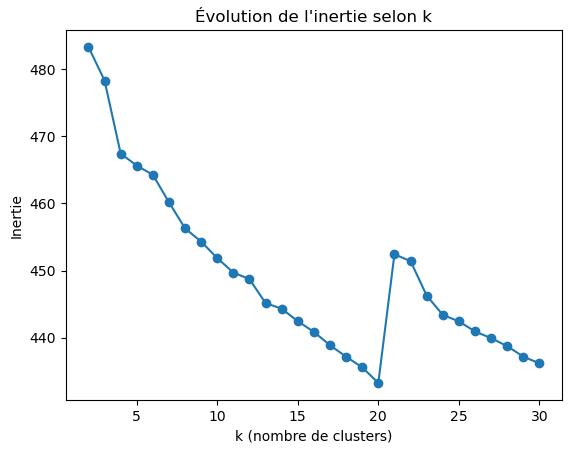

                                       lemmatized_text  kmeans_cluster
0    Great ruling wind farm Scotlandvery smart judg...               1
1    MakeAmericaGreatAgain Trump2016 LIFE CHANGING ...               3
2    ellenEspence Im convinced candidate realDonald...               3
3    Dopey GeorgeWill big proponent Iraq War catast...               3
4    election result France disappointing Europeans...               3
..                                                 ...             ...
495  happened Orlando beginning leadership weak ine...               3
496  RafmyMillan Thanks realDonaldTrump tip entrepr...               0
497  Trump National Doral featured GolfChannel morn...               3
498  Democrats slam GOP healthcare proposal Obamaca...               3
499  FFXFamilyFunMy boy 6 REALLY PassGoMonopoly get...               3

[500 rows x 2 columns]


In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Définir une gamme de valeurs de k à tester (par exemple 2 à 30)
k_values = range(2, 31)
inertia_values = []

# Tester plusieurs valeurs de k et enregistrer l'inertie pour chaque k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # X est la matrice TF-IDF
    inertia_values.append(kmeans.inertia_)

# Afficher l'évolution de l'inertie en fonction de k
plt.plot(k_values, inertia_values, marker='o')
plt.title('Évolution de l\'inertie selon k')
plt.xlabel('k (nombre de clusters)')
plt.ylabel('Inertie')
plt.show()

# Choisir le meilleur k en fonction de l'inertie (par exemple, où l'inertie diminue moins fortement)
best_k = 5 # Exemple, vous pouvez choisir k basé sur l'inertie

# Appliquer K-Means avec le meilleur k
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)

# Ajouter les étiquettes de cluster à vos données
df['kmeans_cluster'] = kmeans.labels_

# Afficher les résultats des clusters
print(df[['lemmatized_text', 'kmeans_cluster']])


In [ ]:
from sklearn.cluster import KMeans

# Appliquer K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Ajouter les clusters au dataset
data["cluster"] = kmeans.labels_
for i in range(5):  # 5 clusters
    print(f"\nCluster {i}:")
    print(data[data["cluster"] == i]["lemmatized_text"].head(10))



## extraire et afficher les mots-clés les plus importants pour chaque cluster, après avoir appliqué l'algorithme K-Means ##

In [43]:
terms = vectorizer.get_feature_names_out()
best_k = 5 # Exemple, vous pouvez choisir k basé sur l'inertie
for i in range( best_k) :
    print(f"Cluster {i}:")
    cluster_center = kmeans.cluster_centers_[i]
    sorted_terms_idx = cluster_center.argsort()[::-1]
    top_terms = [terms[idx] for idx in sorted_terms_idx[:10]]
    print(top_terms)


Cluster 0:
['thanks', 'james', 'apprenticenbc', 'true', 'good', 'support', 'agree', 'club', 'realdonaldtrump', '2016']
Cluster 1:
['great', 'interview', 'thank', 'honor', 'congratulations', 'people', 'leader', 'good', 'case', 'foxandfriends']
Cluster 2:
['new', 'america', 'day', 'trump', 'job', 'make', 'today', 'big', 'york', 'coming']
Cluster 3:
['realdonaldtrump', 'trump', 'thank', 'president', 'like', 'people', 'love', 'good', 'donald', 'dont']
Cluster 4:
['best', 'realdonaldtrump', 'set', 'amazing', 'entrepreneurs', 'skill', 'talent', 'high', 'thing', 'time']


## réduire la dimensionnalité de la matrice de caractéristiques TF-IDF (ou toute autre matrice de vecteurs de texte) et à visualiser les données dans un espace bidimensionnel (2D) à l'aide de la méthode t-SNE  ##

In [47]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_2d = tsne.fit_transform(X.toarray())  # Convertir X (TF-IDF) en dense si ce n'est pas déjà fait

# Ajouter les coordonnées 2D au DataFrame
df['x'] = X_2d[:, 0]
df['y'] = X_2d[:, 1]


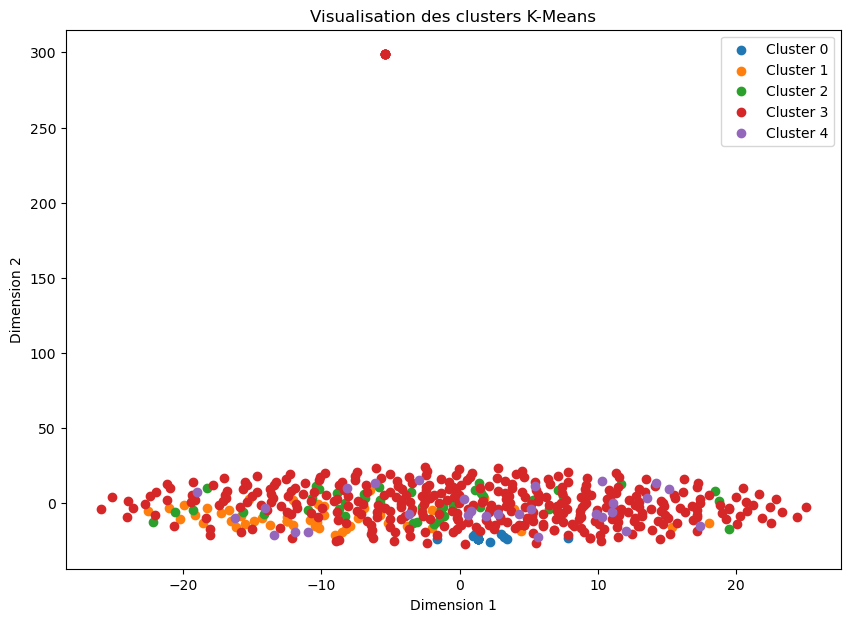

In [49]:
# Tracer les points avec matplotlib
plt.figure(figsize=(10, 7))
for cluster in range(best_k):  # Parcourir chaque cluster
    cluster_points = df[df['kmeans_cluster'] == cluster]
    plt.scatter(cluster_points['x'], cluster_points['y'], label=f'Cluster {cluster}')

plt.title('Visualisation des clusters K-Means')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


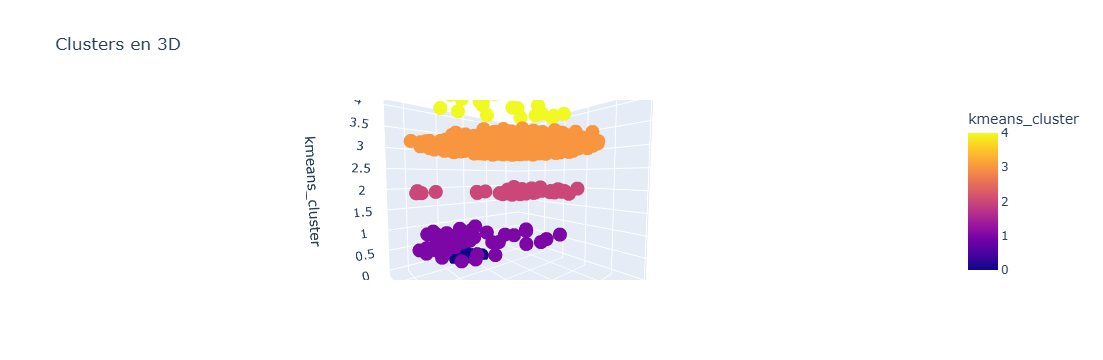

In [181]:
import plotly.express as px

# Visualisation interactive 3D
fig = px.scatter_3d(df, x='x', y='y', z='kmeans_cluster',
                    color='kmeans_cluster', title='Clusters en 3D')
fig.show()


## afficher les cluster et les centroides ## 

C:\Users\USER_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



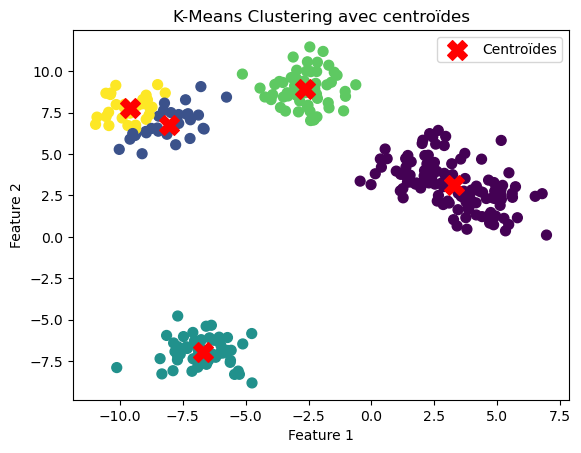

In [240]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Création de données bidimensionnelles de test
X, _ = make_blobs(n_samples=300, centers=5, random_state=42)

# Appliquer K-Means avec k=4 (choisi précédemment)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Récupérer les labels de clusters et les centroïdes
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Tracer les clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroïdes")

plt.title("K-Means Clustering avec centroïdes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## Évaluation de la qualité des clusters##

In [189]:
from sklearn.metrics import silhouette_score

# Calculer le score de silhouette
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Score de silhouette pour k={best_k}: {silhouette_avg}")


Score de silhouette pour k=5: 0.022474529884715395


## Afficher les tweets les plus proches des centroïdes ## 

In [55]:

import pandas as pd

from sklearn.cluster import KMeans

# Appliquer K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)  # X est la matrice TF-IDF
centroids = kmeans.cluster_centers_

# Afficher les tweets les plus proches des centroïdes
for i in range(5):  # Choisir 5 clusters
    centroid_idx = np.argmin(np.linalg.norm(X - centroids[i], axis=1))  # Trouver le tweet le plus proche du centroïde
    print(f"Cluster {i} Centroïde Tweet: {df.iloc[centroid_idx]['cleaned_content']}")


Cluster 0 Centroïde Tweet: Thanks
Cluster 1 Centroïde Tweet: MakeAmericaGreatAgainpictwittercom53qHBKs7yA
Cluster 2 Centroïde Tweet: MakeAmericaGreatAgainpictwittercom53qHBKs7yA
Cluster 3 Centroïde Tweet: MakeAmericaGreatAgainpictwittercom53qHBKs7yA
Cluster 4 Centroïde Tweet: MakeAmericaGreatAgainpictwittercom53qHBKs7yA


## Fonction pour récupérer les tweets proches des centroïdes ## 


In [63]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)  # X est la matrice TF-IDF

# Ajouter les labels de clusters au DataFrame
df['kmeans_cluster'] = kmeans.labels_

# Utiliser la fonction pour trouver les tweets représentatifs
representative_tweets = get_representative_tweets_kmeans(
    df=df,
    X=X,
    centroids=kmeans.cluster_centers_,
    cluster_labels=kmeans.labels_,
    text_column='cleaned_content' 
)

# Afficher les tweets représentatifs
for cluster_id, tweet in representative_tweets:
    print(f"Cluster {cluster_id}: {tweet}")


Cluster 0: Thanks
Cluster 1: tjaugustine Thanksit will be great
Cluster 2: We are here to proclaim that a new day is coming in Latin America In Venezuela and across the Western Hemisphere Socialism is DYING  and liberty prosperity and democracy are being REBORN
Cluster 3: MakeAmericaGreatAgainpictwittercom53qHBKs7yA
Cluster 4: Entrepreneurs Set the bar high Do the best you possibly can Apply your skills and talent but above all be tenacious


## Appliquer Fuzzy C-Means ## 

## installer fuzzy fuzzy-c-means ## 

In [250]:
pip install fuzzy-c-means


## Calcul de la matrice de distances de Jaccard ## 

In [253]:
import numpy as np

# Fonction pour calculer la distance de Jaccard entre deux ensembles de mots
def jaccard_distance(tweet1, tweet2):
    set1 = set(tweet1.split())  # Convertir le tweet en un ensemble de mots
    set2 = set(tweet2.split())
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return 1 - (intersection / union)  # Distance de Jaccard

# Créer une matrice de distances de Jaccard pour tous les tweets
distances = np.zeros((len(tweets), len(tweets)))

for i in range(len(tweets)):
    for j in range(i + 1, len(tweets)):
        dist = jaccard_distance(tweets[i], tweets[j])
        distances[i][j] = dist
        distances[j][i] = dist  # La matrice est symétrique

# Afficher la matrice de distances de Jaccard pour les 5 premiers tweets
print(distances[:5, :5])  # Afficher les 5 premiers tweets par exemple


[[0.         1.         1.         1.         0.96666667]
 [1.         0.         1.         1.         1.        ]
 [1.         1.         0.         0.97297297 0.94117647]
 [1.         1.         0.97297297 0.         0.97435897]
 [0.96666667 1.         0.94117647 0.97435897 0.        ]]


 ## Appliquer Fuzzy C-Means avec la matrice de distances de Jaccard ##

In [256]:
from fcmeans import FCM

# Appliquer Fuzzy C-Means
fcm = FCM(n_clusters=5)  # Choisir le nombre de clusters
fcm.fit(distances)  # Utiliser la matrice de distances de Jaccard

# Récupérer les labels de cluster (les clusters les plus probables pour chaque tweet)
labels_fcm = fcm.predict(distances)

# Ajouter les labels de cluster au DataFrame
df['fcm_cluster'] = labels_fcm

# Afficher les résultats des clusters
print(df[['lemmatized_text', 'fcm_cluster']].head())


                                     lemmatized_text  fcm_cluster
0  Great ruling wind farm Scotlandvery smart judg...            3
1  MakeAmericaGreatAgain Trump2016 LIFE CHANGING ...            3
2  ellenEspence Im convinced candidate realDonald...            4
3  Dopey GeorgeWill big proponent Iraq War catast...            4
4  election result France disappointing Europeans...            4


## Visualisation des clusters ##

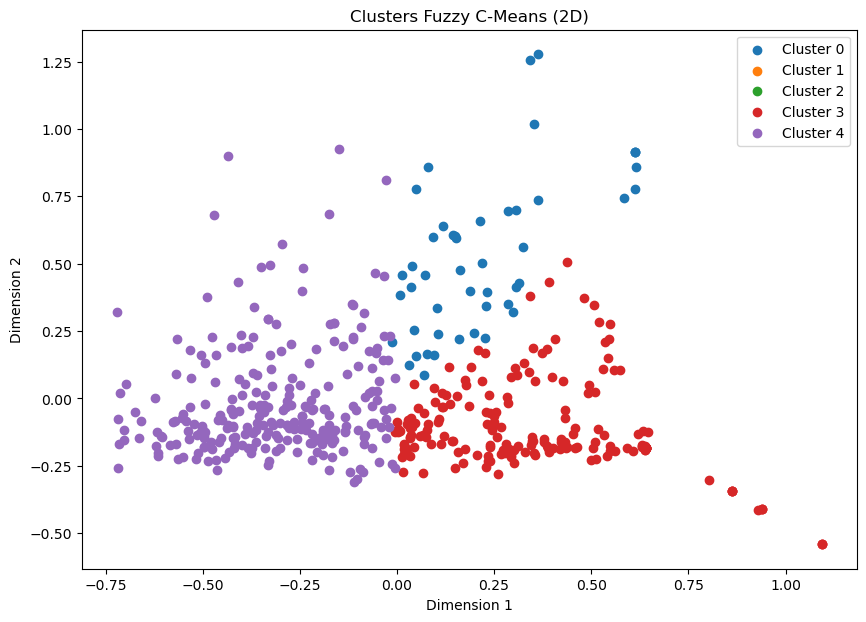

In [259]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduction de dimension avec PCA (pour visualiser en 2D)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(distances)

# Ajouter les coordonnées 2D au DataFrame
df['x'] = X_2d[:, 0]
df['y'] = X_2d[:, 1]

# Visualiser les clusters Fuzzy C-Means en 2D
plt.figure(figsize=(10, 7))
for cluster in range(5):  # 5 clusters
    cluster_points = df[df['fcm_cluster'] == cluster]
    plt.scatter(cluster_points['x'], cluster_points['y'], label=f'Cluster {cluster}')
    
plt.title('Clusters Fuzzy C-Means (2D)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


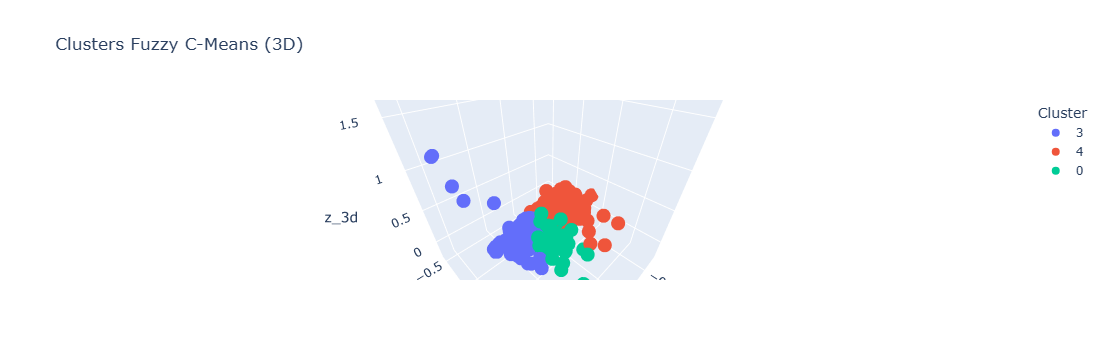

In [261]:
import plotly.express as px

# Réduction de dimension en 3D
pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(distances)

# Ajouter les coordonnées 3D au DataFrame
df['x_3d'] = X_3d[:, 0]
df['y_3d'] = X_3d[:, 1]
df['z_3d'] = X_3d[:, 2]

# Visualisation des clusters Fuzzy C-Means en 3D
fig = px.scatter_3d(df, x='x_3d', y='y_3d', z='z_3d',
                    color=df['fcm_cluster'].astype(str),  # Colorier les clusters
                    title='Clusters Fuzzy C-Means (3D)',
                    labels={'color': 'Cluster'})
fig.show()


##  Calculer les centroïdes des clusters # #

In [263]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

# Fonction pour obtenir le centroïde de chaque cluster
def get_centroids(df, cluster_column, coordinates_columns):
    centroids = {}
    for cluster in df[cluster_column].unique():
        # Extraire les coordonnées des tweets appartenant à ce cluster
        cluster_points = df[df[cluster_column] == cluster][coordinates_columns]
        centroid = cluster_points.mean(axis=0)  # Calcul du centroïde (moyenne des points)
        centroids[cluster] = centroid
    return centroids

# Calculer les centroïdes pour les clusters 2D
coordinates_2d = ['x', 'y']
centroids_2d = get_centroids(df, 'fcm_cluster', coordinates_2d)

# Afficher les centroïdes
for cluster, centroid in centroids_2d.items():
    print(f"Centroïde du cluster {cluster}: {centroid}")


Centroïde du cluster 3: x    0.354343
y   -0.108096
dtype: float64
Centroïde du cluster 4: x   -0.311221
y   -0.014687
dtype: float64
Centroïde du cluster 0: x    0.224099
y    0.531090
dtype: float64


## obtenir le tweet le plus proche du centroïde ##

In [266]:
# Fonction pour obtenir le tweet le plus proche du centroïde
def get_closest_tweet(df, cluster_column, coordinates_columns, centroids):
    closest_tweets = []
    for cluster in df[cluster_column].unique():
        # Extraire les coordonnées des tweets appartenant à ce cluster
        cluster_points = df[df[cluster_column] == cluster]
        centroid = centroids[cluster]
        
        # Calculer la distance entre chaque tweet et le centroïde
        distances = euclidean_distances(cluster_points[coordinates_columns], [centroid])
        
        # Trouver l'index du tweet le plus proche
        closest_index = np.argmin(distances)  # Indice du tweet le plus proche
        closest_tweet = cluster_points.iloc[closest_index]
        
        closest_tweets.append(closest_tweet)
        
    return closest_tweets

# Trouver les tweets les plus proches des centroïdes
closest_tweets = get_closest_tweet(df, 'fcm_cluster', coordinates_2d, centroids_2d)

# Afficher les tweets les plus proches de chaque cluster
for tweet in closest_tweets:
    print(f"Tweet représentant le cluster {tweet['fcm_cluster']}: {tweet['cleaned_content']}")


Tweet représentant le cluster 3: Trump Golf Links at Ferry Point Grand Opening next Tuesday May 26th at 11 AM Jack Nicklaus will be joining me
Tweet représentant le cluster 4: President Obama please take the 5M check for charity tomorrow It is so easy and could do so much good
Tweet représentant le cluster 0: NRO cancelling my subscription you people are idiots  realDonaldTrump WILL be our next President  Trump2016  RNC
